In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import numpy
import glob
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import scipy
from tensorflow.keras.callbacks import ModelCheckpoint
from PIL import Image


In [ ]:
od.download(
    "https://www.kaggle.com/datasets/gpiosenka/100-bird-species/data")

In [2]:
! pip install -q kaggle


from google.colab import files

files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json


! kaggle datasets list

! kaggle datasets download -d gpiosenka/100-bird-species

! unzip 100-bird-species.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: train/WHITE TAILED TROPIC/120.jpg  
  inflating: train/WHITE TAILED TROPIC/121.jpg  
  inflating: train/WHITE TAILED TROPIC/122.jpg  
  inflating: train/WHITE TAILED TROPIC/123.jpg  
  inflating: train/WHITE TAILED TROPIC/124.jpg  
  inflating: train/WHITE TAILED TROPIC/125.jpg  
  inflating: train/WHITE TAILED TROPIC/126.jpg  
  inflating: train/WHITE TAILED TROPIC/127.jpg  
  inflating: train/WHITE TAILED TROPIC/128.jpg  
  inflating: train/WHITE TAILED TROPIC/129.jpg  
  inflating: train/WHITE TAILED TROPIC/130.jpg  
  inflating: train/WHITE TAILED TROPIC/131.jpg  
  inflating: train/WHITE TAILED TROPIC/132.jpg  
  inflating: train/WHITE TAILED TROPIC/133.jpg  
  inflating: train/WHITE TAILED TROPIC/134.jpg  
  inflating: train/WHITE TAILED TROPIC/135.jpg  
  inflating: train/WHITE TAILED TROPIC/136.jpg  
  inflating: train/WHITE TAILED TROPIC/137.jpg  
  inflating: train/WHITE TAILED TROPIC/138.jpg  
  inflating: train/WHI

In [ ]:
import os
num_of_bird_groups = len(os.listdir("100-bird-species/train/"))
num_of_bird_groups

In [3]:
import pathlib
import numpy as np

data_dir = pathlib.Path("100-bird-species/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory
print(class_names)

[]


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

In [5]:
import numpy as np
import pandas as pd
import os
import numpy
import glob
import cv2
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

Image shape: (224, 224, 3)


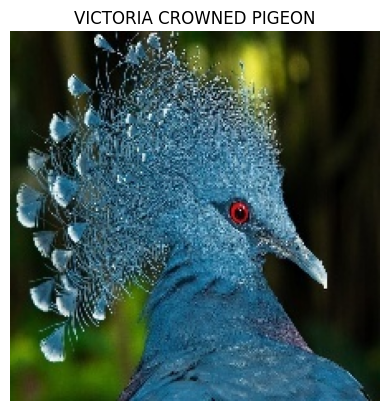

In [6]:
img = view_random_image(target_dir = "train/",
                        target_class = "VICTORIA CROWNED PIGEON") # or we can write nike instead of converse to see converse examples

In [7]:
import tensorflow as tf
img.shape #(width, height, colour channels)

(224, 224, 3)

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


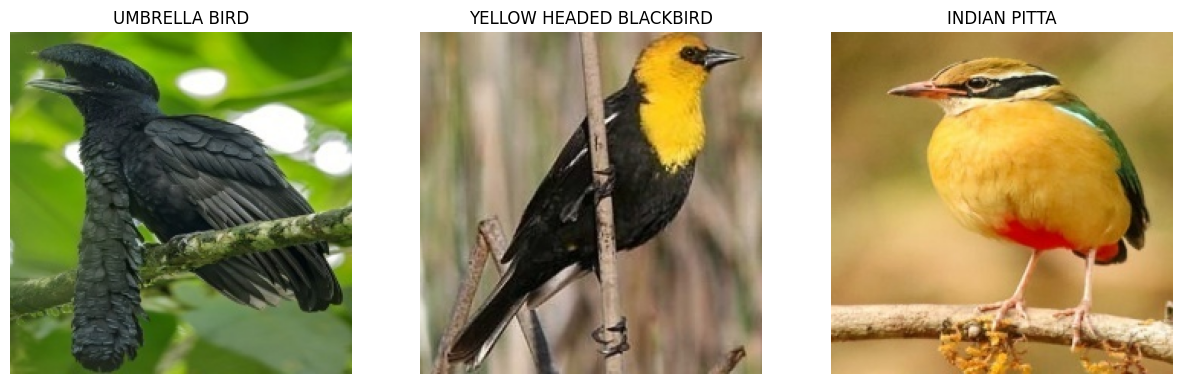

In [8]:
plt.figure(figsize = (15,7))
plt.subplot(1,3,1)
steak_image = view_random_image("valid/", "UMBRELLA BIRD")
plt.subplot(1,3,2)
pizza_image = view_random_image("train/", "YELLOW HEADED BLACKBIRD")
plt.subplot(1,3,3)
pizza_image = view_random_image("test/", "INDIAN PITTA")

In [9]:
import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [10]:
train_dir = "train/"
test_dir = "test/"
val_dir = "valid/"

In [11]:
# Rescale
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (224,224),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [12]:
# 1. Create a base model with tf.keras.applications

base_model = tf.keras.applications.InceptionV3(include_top= False,)

# 2. Freeze the base model
base_model.trainable = False

#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(224,224,3), name = "input-layer")

#4. Rescaling
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#5. Pass the inputs
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. Create the output activation layer
outputs = tf.keras.layers.Dense(525, activation = "softmax", name = "output-layer")(x)

# 8. Combine the inputs with outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])


history = model_0.fit(train_data,
                                 epochs=10,
                                 steps_per_epoch = len(train_data),
                                 validation_data = val_data,
                                 validation_steps = int(0.25*len(val_data)),)
model_0.save("InceptionV3_1.h5")

87910968/87910968 [==============================] - 1s 0us/step
Shape after passing inputs through base model: (None, 5, 5, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)
Epoch 1/10
2645/2645 [==============================] - 226s 79ms/step - loss: 10.7100 - accuracy: 0.4797 - val_loss: 7.8782 - val_accuracy: 0.6172
Epoch 2/10
2645/2645 [==============================] - 208s 78ms/step - loss: 7.7363 - accuracy: 0.6681 - val_loss: 6.3071 - val_accuracy: 0.7625
Epoch 3/10
2645/2645 [==============================] - 207s 78ms/step - loss: 6.5089 - accuracy: 0.7348 - val_loss: 7.9263 - val_accuracy: 0.7031
Epoch 4/10
2645/2645 [==============================] - 207s 78ms/step - loss: 5.6637 - accuracy: 0.7725 - val_loss: 6.4479 - val_accuracy: 0.7656
Epoch 5/10
2645/2645 [==============================] - 207s 78ms/step - loss: 5.0255 - accuracy: 0.8014 - val_loss: 6.8266 - val_accuracy: 0.7641
Epoch 6/10
2645/2645 [==============================] - 207s 78ms/step - loss: 4.467

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
history = model_0.fit(train_data,
                                 initial_epoch=10,
                                 epochs=20,
                                 steps_per_epoch = len(train_data),
                                 validation_data = val_data,
                                 validation_steps = int(0.25*len(val_data)),)
model_0.save("InceptionV3_2.h5")

Epoch 11/20
2645/2645 [==============================] - 207s 78ms/step - loss: 2.8429 - accuracy: 0.8850 - val_loss: 6.7379 - val_accuracy: 0.8234
Epoch 12/20
2645/2645 [==============================] - 207s 78ms/step - loss: 2.6430 - accuracy: 0.8931 - val_loss: 6.4166 - val_accuracy: 0.8422
Epoch 13/20
2645/2645 [==============================] - 207s 78ms/step - loss: 2.4104 - accuracy: 0.9031 - val_loss: 6.1309 - val_accuracy: 0.8406
Epoch 14/20
2645/2645 [==============================] - 205s 77ms/step - loss: 2.3322 - accuracy: 0.9066 - val_loss: 7.1176 - val_accuracy: 0.8250
Epoch 15/20
2645/2645 [==============================] - 206s 78ms/step - loss: 2.1566 - accuracy: 0.9146 - val_loss: 7.5474 - val_accuracy: 0.8391
Epoch 16/20
2645/2645 [==============================] - 204s 77ms/step - loss: 2.0949 - accuracy: 0.9162 - val_loss: 8.0695 - val_accuracy: 0.8156
Epoch 17/20
2645/2645 [==============================] - 204s 77ms/step - loss: 1.9334 - accuracy: 0.9229 - val_

In [14]:
history = model_0.fit(train_data,
                                 initial_epoch=20,
                                 epochs=30,
                                 steps_per_epoch = len(train_data),
                                 validation_data = val_data,
                                 validation_steps = int(0.25*len(val_data)),)
model_0.save("InceptionV3_3.h5")

Epoch 21/30
2645/2645 [==============================] - 203s 77ms/step - loss: 1.6117 - accuracy: 0.9366 - val_loss: 8.3687 - val_accuracy: 0.8188
Epoch 22/30
2645/2645 [==============================] - 206s 78ms/step - loss: 1.5707 - accuracy: 0.9388 - val_loss: 6.9719 - val_accuracy: 0.8625
Epoch 23/30
2645/2645 [==============================] - 207s 78ms/step - loss: 1.5013 - accuracy: 0.9411 - val_loss: 7.6129 - val_accuracy: 0.8594
Epoch 24/30
2645/2645 [==============================] - 206s 78ms/step - loss: 1.4000 - accuracy: 0.9456 - val_loss: 10.1968 - val_accuracy: 0.8188
Epoch 25/30
2645/2645 [==============================] - 205s 78ms/step - loss: 1.4213 - accuracy: 0.9461 - val_loss: 9.3828 - val_accuracy: 0.8266
Epoch 26/30
2645/2645 [==============================] - 205s 77ms/step - loss: 1.3520 - accuracy: 0.9487 - val_loss: 8.2168 - val_accuracy: 0.8453
Epoch 27/30
2645/2645 [==============================] - 207s 78ms/step - loss: 1.3460 - accuracy: 0.9495 - val

In [ ]:
history = model_0.fit(train_data,
                                 initial_epoch=30,
                                 epochs=40,
                                 steps_per_epoch = len(train_data),
                                 validation_data = val_data,
                                 validation_steps = int(0.25*len(val_data)),)
model_0.save("InceptionV3_4.h5")

Epoch 31/40
2645/2645 [==============================] - 210s 79ms/step - loss: 1.1740 - accuracy: 0.9565 - val_loss: 8.9179 - val_accuracy: 0.8656
Epoch 32/40
2645/2645 [==============================] - 208s 79ms/step - loss: 1.1409 - accuracy: 0.9583 - val_loss: 9.5131 - val_accuracy: 0.8453
Epoch 33/40
2645/2645 [==============================] - 209s 79ms/step - loss: 1.0751 - accuracy: 0.9592 - val_loss: 8.5141 - val_accuracy: 0.8562
Epoch 34/40
 872/2645 [========>.....................] - ETA: 2:17 - loss: 0.8590 - accuracy: 0.9662

In [ ]:
model_0.save_weights("InceptionV3.h5")

In [ ]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 global_average_pooling_lay  (None, 2048)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output-layer (Dense)        (None, 525)               1075725   
                                                                 
Total params: 22878509 (87.27 MB)
Trainable params: 1075725 (4.10 MB)
Non-trainable params: 21802784 (83.17 MB)
_____________

In [ ]:
model_0.evaluate(test_data)

83/83 [==============================] - 8s 94ms/step - loss: 5.3162 - accuracy: 0.8457


[5.316202163696289, 0.845714271068573]

In [ ]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

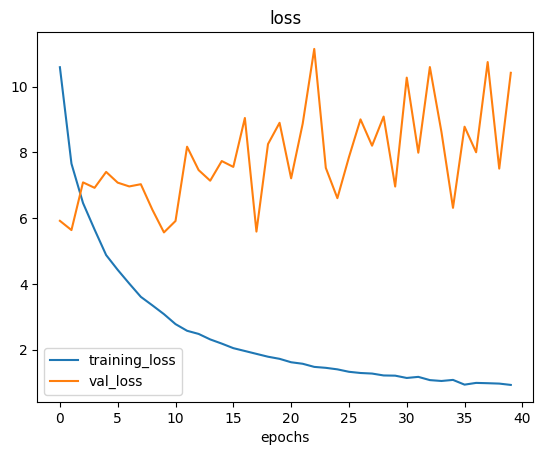

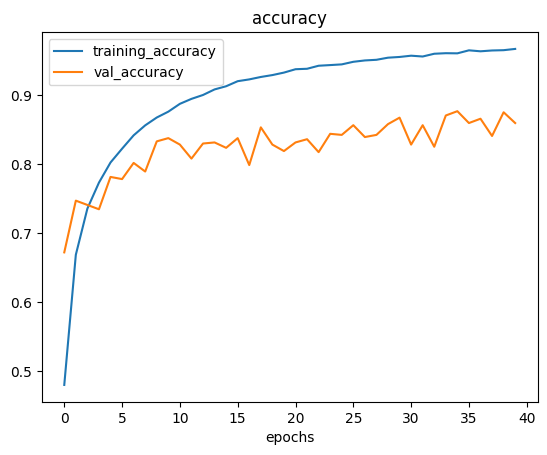

In [ ]:
plot_loss_curves(history)

In [ ]:
import pickle

In [ ]:
model_0.save("InceptionV3_tamamlandı.h5")

In [ ]:
# Eğitim verileri üzerinde loss ve accuracy değerlerini almak
train_loss, train_accuracy = model_0.evaluate(train_data)

# Test verileri üzerinde loss ve accuracy değerlerini almak
test_loss, test_accuracy = model_0.evaluate(test_data)

# Sonuçları tablo olarak yazdırma
print("Eğitim Verileri:")
print(f"Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}")

print("Test Verileri:")
print(f"Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")

NameError: name 'model_0' is not defined

In [ ]:
# Verileri bir DataFrame'e dönüştürme
data = {
    'Veri Kümesi': ['Eğitim', 'Test'],
    'Loss': [train_loss, test_loss],
    'Accuracy': [train_accuracy, test_accuracy]
}

df = pd.DataFrame(data)

# DataFrame'i tablo olarak yazdırma
print(df)

  Veri Kümesi      Loss  Accuracy
0      Eğitim  0.872610  0.967897
1        Test  6.672862  0.880762


In [ ]:
from sklearn.metrics import precision_score

# Test verileri üzerinde tahminler yapma
y_pred = model_0.predict_classes(train_data)

# Precision değerini hesaplama
precision = precision_score(test_data, y_pred)

# Precision değerini yazdırma
print("Precision:", precision)

NameError: name 'model_0' is not defined